In [ ]:
'''
2. Neural Network Classifier with Keras
Using the multi-label classifier dataset from earlier exercises (categorized-comments.jsonl in the reddit folder), fit a neural network classifier using Keras. Use the code found in chapter 12 of the Applied Text Analysis with Python book as a guideline. Report the accuracy, precision, recall, F1-score, and confusion matrix.
'''

In [1]:
# Training a multiclass Classifier
# Using Keras to construct a feedforward neural network with an output layer with soft-max activation functions

# Load libraries
import numpy as np
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

#import json library to read data in jsonl file
import json
#import pandas library
import pandas as pd

In [2]:
#read in the data as a dataframe
filename = "/home/arindam/Documents/mygithub/bu_dsc/data/raw/categorized-comments.jsonl"
with open(filename, 'r') as f:
    jsonl_list = list(f)

list1 = []
for obj in jsonl_list:
    res = json.loads(obj)
    list1.append(res)
    
comments = pd.DataFrame(list1)

#display the first few rows of data
comments.head()
# len(list1)

,cat,txt
0,sports,Barely better than Gabbert? He was significant...
1,sports,Fuck the ducks and the Angels! But welcome to ...
2,sports,Should have drafted more WRs.\n\n- Matt Millen...
3,sports,[Done](https://i.imgur.com/2YZ90pm.jpg)
4,sports,No!! NOO!!!!!


In [3]:
#Convert text to lowercase and romove punctuation
#define a function to clean the text
# import the required libraries here
#import regular expressions library
import re

def clean_text(text):
    """
    Remove punctuations and special characters, makes lower case
    Args: text
    Output: text
    """
    text=text.lower() #makes text lowercase
    text=re.sub('\\d|\\W+|_',' ',text) #removes extra white space
    text=re.sub('[^a-zA-Z]'," ", text) #removes any non-alphabetic characters
    return text

In [4]:
# Cleaning texts in the comments
# Using the transformed column for the model
# Testing the functions

sample_size = 50000
sample_cmnts = comments[:sample_size]
sample_cmnts['cleaned']=sample_cmnts['txt'].apply(clean_text)
# creating a dictionary to replace the string values to numeric
d = {'sports':1,'science_and_technology':2,'video_games':3}
sample_cmnts['ncat'] = sample_cmnts['cat'].map(d)
sample_cmnts.head

<bound method NDFrame.head of           cat                                                txt  \
0      sports  Barely better than Gabbert? He was significant...   
1      sports  Fuck the ducks and the Angels! But welcome to ...   
2      sports  Should have drafted more WRs.\n\n- Matt Millen...   
3      sports            [Done](https://i.imgur.com/2YZ90pm.jpg)   
4      sports                                      No!! NOO!!!!!   
...       ...                                                ...   
49995  sports  Florida State\nAlabama\nMichigan\nAlabama\nAla...   
49996  sports                                        Never does.   
49997  sports  I think Tosh is our best one left. Napier is g...   
49998  sports      Close, and we could really use a tight end...   
49999  sports  Yeah but that didn't really end all that well ...   

                                                 cleaned  ncat  
0      barely better than gabbert he was significantl...     1  
1      fuck the ducks a

In [5]:
sample_cmnts.ncat.value_counts()

2    25111
1    24889
Name: ncat, dtype: int64

In [6]:
# Get the target name
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras_preprocessing.text import Tokenizer
# from sklearn.feature_extraction.text import CountVectorizer
# from nltk.corpus import stopwords


number_of_features = 5000

# Loading the training and testing data sets
features, target = sample_cmnts.cleaned, sample_cmnts.ncat
comments_train,comments_test,y_train, y_test = train_test_split(features,target, random_state=1000, test_size = 0.3)

# vectorizer = CountVectorizer(lowercase=True, stop_words='english')
# vectorizer.fit(comments_train) # vocabulary using only the training data

# Convert the feature data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
tokenizer.fit_on_texts(comments_train)

sequence_train = tokenizer.texts_to_sequences(comments_train)
sequence_test = tokenizer.texts_to_sequences(comments_test)

X_train = tokenizer.sequences_to_matrix(sequence_train, mode='binary')
X_test = tokenizer.sequences_to_matrix(sequence_test, mode="binary")

# X_train = vectorizer.transform(comments_train)
# X_test = vectorizer.transform(comments_test)

# Convert the target vector
target_train = to_categorical(y_train)
target_test = to_categorical(y_test)

In [15]:
print("Training features: ", X_train.shape[1])
print("Testing features: ", X_test.shape[1])
print("Using the same Training vocabulary")

Training features:  5000
Testing features:  5000
Using the same Training vocabulary


In [ ]:
# comments_train
# X_train.shape
# X_test.shape
# y_train.shape
# target_train.shape
#target_test.shape

In [8]:
# Start Neural Network
# rerunning the .fit method will start off with the computed weights from the previous training
from keras.backend import clear_session
clear_session()

# input_dim = X_train.shape[1] # Number of features
network = models.Sequential()

In [9]:
# Adding fully connected input layer with a ReLU activation function
network.add(layers.Dense(units=100,
                         activation='relu',
                         input_shape=(number_of_features,)))

In [10]:
# Add fully connected layer with ReLU activation function
network.add(layers.Dense(units=100, activation="relu"))

In [11]:
# Add fully connected layer with a softmax activation function
network.add(layers.Dense(units=3, activation="softmax"))

In [12]:
# Compile neural network
network.compile(loss="categorical_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               500100    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 510,503
Trainable params: 510,503
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Train neural network
history = network.fit(X_train, # Features
                      target_train, # Target
                      epochs=3, # Three epochs
                      verbose=1, # show output
                      batch_size=100, # Number of observations per batch
                      validation_data=(X_test, target_test)) # Test data

Epoch 1/3
350/350 [==============================] - 58s 164ms/step - loss: 0.3118 - accuracy: 0.8535 - val_loss: 0.2513 - val_accuracy: 0.8806
Epoch 2/3
350/350 [==============================] - 55s 157ms/step - loss: 0.2282 - accuracy: 0.8901 - val_loss: 0.2440 - val_accuracy: 0.8822
Epoch 3/3
350/350 [==============================] - 56s 160ms/step - loss: 0.2108 - accuracy: 0.8963 - val_loss: 0.2447 - val_accuracy: 0.8832


In [14]:
# Evaluating the model

loss, accuracy = network.evaluate(X_train, target_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = network.evaluate(X_test, target_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9102
Testing Accuracy:  0.8832


In [16]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

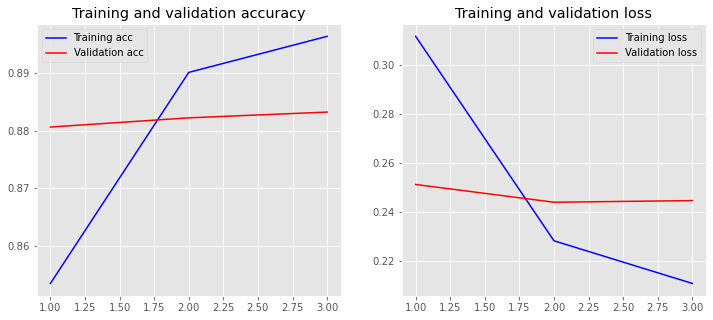

In [17]:
# Finally, we will plot the loss and accuracy values for training and test sets to see if our model is overfitting.
plot_history(history)

In [18]:
# Saving the Model

model_path="/home/arindam/Documents/mygithub/bu_dsc/models"
model_name="NN_keras.h5"
filename = model_path + "/" + model_name 
# print(filename)
network.save(filename)

In [19]:
# Load a saved model
from keras.models import load_model
NN_clf = load_model(filename)


In [20]:
X_test.shape

(15000, 5000)

In [21]:
# Predicting the test set for the classifier
y_pred = NN_clf.predict(X_test)
y_pred

array([[8.4830348e-26, 1.4433853e-05, 9.9998558e-01],
       [1.5950171e-08, 6.9922125e-01, 3.0077866e-01],
       [0.0000000e+00, 1.0000000e+00, 2.1408606e-11],
       ...,
       [4.8931875e-06, 5.4997528e-01, 4.5001990e-01],
       [0.0000000e+00, 1.0000000e+00, 2.6510664e-08],
       [3.2506643e-06, 4.5769817e-01, 5.4229856e-01]], dtype=float32)

In [22]:
# Showing precision,recall, f1-score for each of the 3 outputs
from sklearn import metrics
import numpy as np

y_pred1 = np.around(NN_clf.predict(X_test))
print(metrics.classification_report(target_test,y_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.89      0.88      0.88      7463
           2       0.88      0.89      0.88      7537

   micro avg       0.88      0.88      0.88     15000
   macro avg       0.59      0.59      0.59     15000
weighted avg       0.88      0.88      0.88     15000
 samples avg       0.88      0.88      0.88     15000



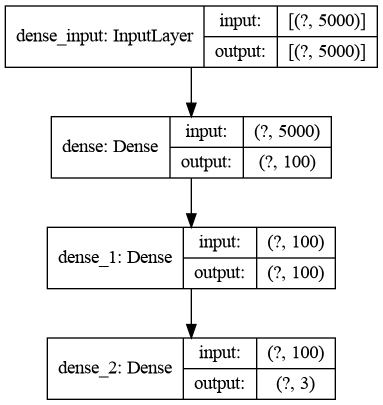

In [23]:
# Printing the architecture of my NN model
from keras.utils import plot_model

fig_path="/home/arindam/Documents/mygithub/bu_dsc/reports/figures"
fig_name="NN_keras.png"
filename = fig_path + "/" + fig_name 

plot_model(network, to_file=filename, show_shapes=True, show_layer_names=True)